In [9]:
import pandas as pd
import numpy as np
import datetime as dt

import os
import requests
import alpaca_trade_api as tradeapi
import yfinance as yf
from pathlib import Path
from dotenv import load_dotenv
#from coinpaprika import client as Coinpaprika
from MCForecastTools import MCSimulation


In [10]:
# Load .env enviroment variables
load_dotenv()

True

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
#importing crypto historical data from csv
csv_path1 = Path ("project_files/BTC-USD_2017_2022.csv")
csv_path2 = Path ("project_files/ETH-USD_2017_2022.csv")
csv_path3 = Path ("project_files/XRP-USD_2017_2022.csv")



btc_historical = pd.read_csv(csv_path1, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_historical = pd.read_csv(csv_path2, index_col="Date", infer_datetime_format=True, parse_dates=True)
xrp_historical = pd.read_csv(csv_path3, index_col="Date", infer_datetime_format=True, parse_dates=True)




In [5]:
#importing Nasdaq, S&P and historical data using yfinance API
ada = yf.Ticker("ADA-USD")
ixic = yf.Ticker("^IXIC")
gspc = yf.Ticker("^GSPC")
axjo = yf.Ticker("^AXJO")

#set the start and end
ada_historical = ada.history(interval="1d", start="2017-01-01", end= "2022-01-01")
ixic_historical = ixic.history(interval="1d", start="2017-01-01", end= "2022-01-01")
gspc_historical = gspc.history(interval="1d", start="2017-01-01", end= "2022-01-01")
axjo_historical = axjo.history(interval="1d", start="2017-01-01", end= "2022-01-01")

In [6]:
#drop columns
btc_historical.drop(['High',"Low", "Open", "Adj Close", "Volume"], axis=1, inplace=True)
eth_historical.drop(['High',"Low", "Open", "Adj Close", "Volume"], axis=1, inplace=True)
xrp_historical.drop(['High',"Low", "Open", "Adj Close", "Volume"], axis=1, inplace=True)
ixic_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
gspc_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
ada_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)
axjo_historical.drop(['High',"Low", "Open", "Stock Splits", "Volume", "Dividends"], axis=1, inplace=True)


In [7]:
#calculate percentage change and drop nulls

btc_daily_change = btc_historical.pct_change().dropna()
eth_daily_change = eth_historical.pct_change().dropna()
xrp_daily_change = xrp_historical.pct_change().dropna()
ixic_daily_change =  ixic_historical.pct_change().dropna()
gspc_daily_change = gspc_historical.pct_change().dropna()
ada_daily_change = ada_historical.pct_change().dropna()
axjo_daily_change = axjo_historical.pct_change().dropna()





In [8]:
#rename columns
btc_daily_change = btc_daily_change.rename(columns={"Close":"Bitcoin"})
eth_daily_change = eth_daily_change.rename(columns={"Close":"Ethereum"})
xrp_daily_change = xrp_daily_change.rename(columns={"Close":"Ripple"})
ixic_daily_change = ixic_daily_change.rename(columns={"Close":"Nasdaq"})
gspc_daily_change = gspc_daily_change.rename(columns={"Close":"S&P500"})
ada_daily_change = ada_daily_change.rename(columns={"Close":"Cardano"})
axjo_daily_change = axjo_daily_change.rename(columns={"Close":"ASX"})


In [9]:
#concat dataframes
crypto_df = pd.concat([btc_daily_change, eth_daily_change, xrp_daily_change, ada_daily_change], axis="columns", join="inner")
stock_df = pd.concat([ixic_daily_change, gspc_daily_change, axjo_daily_change], axis="columns", join="inner")

combined_df = pd.concat([crypto_df, stock_df], axis="columns", join="inner")

combined_df


,Bitcoin,Ethereum,Ripple,Cardano,Nasdaq,S&P500,ASX
Date,,,,,,,
2017-11-10,-0.073554,-0.067411,-0.050600,-0.153933,0.000132,-0.000898,-0.003306
2017-11-13,0.102422,0.028606,0.030926,0.076365,0.000987,0.000984,-0.001261
2017-11-14,0.011626,0.066037,0.031375,0.016352,-0.002920,-0.002310,-0.009266
2017-11-15,0.102444,-0.012659,0.014922,0.008197,-0.004699,-0.005526,-0.005330
2017-11-16,0.076023,-0.007298,0.066450,0.042919,0.012985,0.008196,0.001567
...,...,...,...,...,...,...,...
2021-12-21,0.043864,0.021967,0.077081,0.034419,0.024041,0.017778,0.008612
2021-12-22,-0.006296,-0.009492,0.007443,0.036836,0.011785,0.010180,0.001332
2021-12-23,0.044337,0.031621,0.040417,0.110426,0.008471,0.006224,0.003096



Bad key text.latex.preview in file C:\Users\triba\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\triba\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\triba\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

<AxesSubplot:xlabel='Date'>

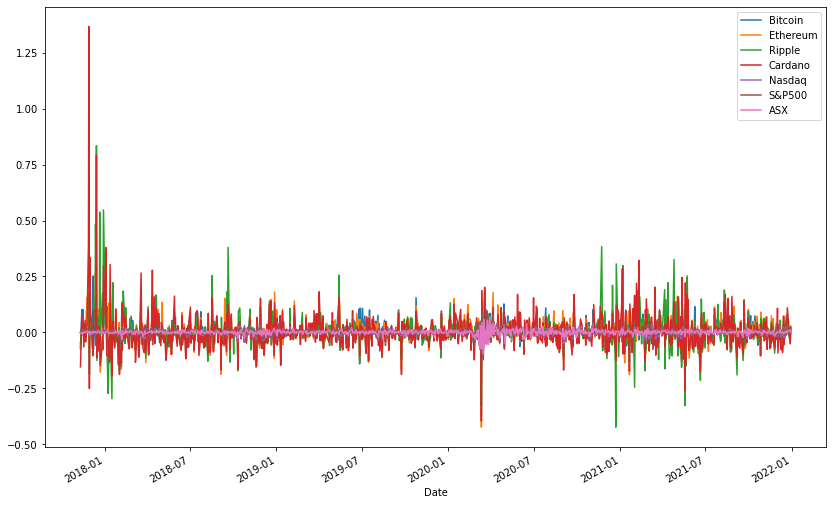

In [10]:
#plot daily returns
combined_df.plot(figsize=(14, 9))

In [11]:
#standard deviation 
combined_df.std()


Bitcoin     0.044738
Ethereum    0.055312
Ripple      0.076674
Cardano     0.084787
Nasdaq      0.014755
S&P500      0.013164
ASX         0.011082
dtype: float64

<AxesSubplot:xlabel='Date'>

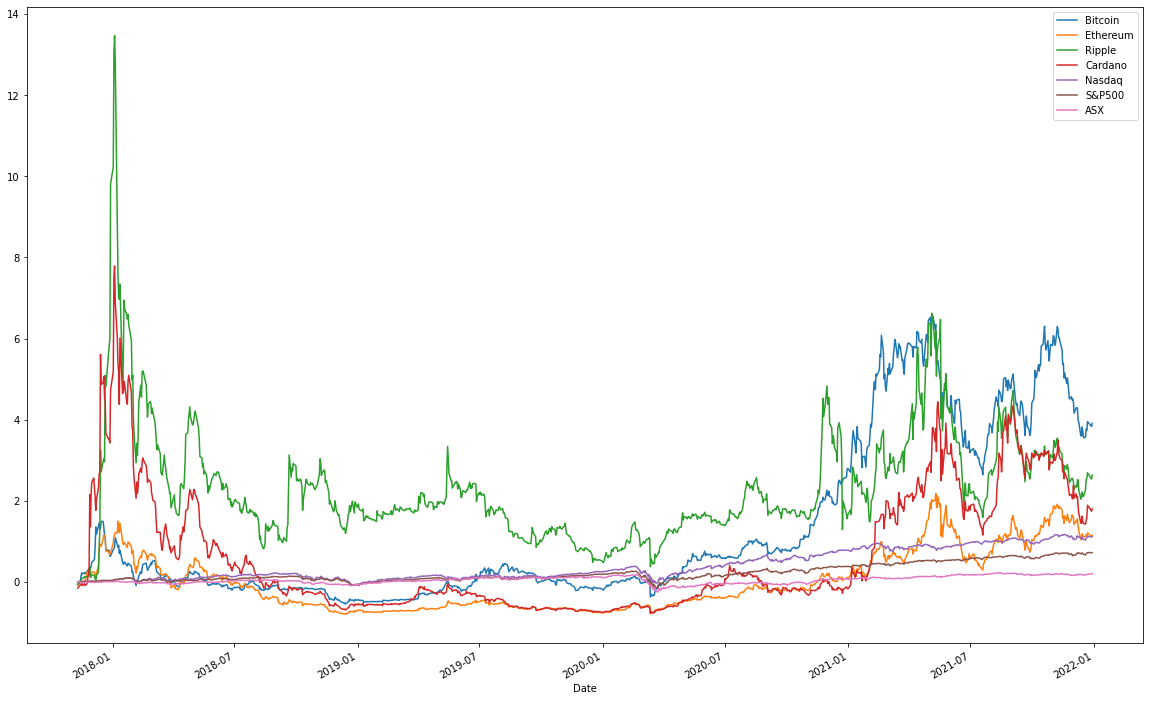

In [12]:
#plot cumulative returns

cum_returns = (1 + combined_df).cumprod() - 1

cum_returns.plot(figsize=(20,13))

In [13]:
#calculate annualized standard deviation

annualized_btc_std= btc_daily_change.std() * np.sqrt(365)
annualized_eth_std= eth_daily_change.std() * np.sqrt(365)
annualized_xrp_std= xrp_daily_change.std() * np.sqrt(365)
annualized_ada_std= ada_daily_change.std() * np.sqrt(365)
annualized_ixic_std= ixic_daily_change.std() * np.sqrt(256)
annualized_gspc_std= gspc_daily_change.std() * np.sqrt(256)
annualized_axjo_std= axjo_daily_change.std() * np.sqrt(256)

print(f"The annualized standard deviation for Bitcoin is : {annualized_btc_std.values}")
print(f"The annualized standard deviation for Ethereum is : {annualized_eth_std.values}")
print(f"The annualized standard deviation for Ripple is : {annualized_xrp_std.values}")
print(f"The annualized standard deviation for Cardano is : {annualized_ada_std.values}")
print(f"The annualized standard deviation for S&P500 is : {annualized_gspc_std.values}")
print(f"The annualized standard deviation for Nasdaq is : {annualized_ixic_std.values}")
print(f"The annualized standard deviation for ASX is : {annualized_ixic_std.values}")

The annualized standard deviation for Bitcoin is : [0.80157159]
The annualized standard deviation for Ethereum is : [0.98978657]
The annualized standard deviation for Ripple is : [1.35829544]
The annualized standard deviation for Cardano is : [1.52254528]
The annualized standard deviation for S&P500 is : [0.1939719]
The annualized standard deviation for Nasdaq is : [0.21911942]
The annualized standard deviation for ASX is : [0.21911942]


In [14]:
#calculate rolling standard deviation

<AxesSubplot:xlabel='Date'>

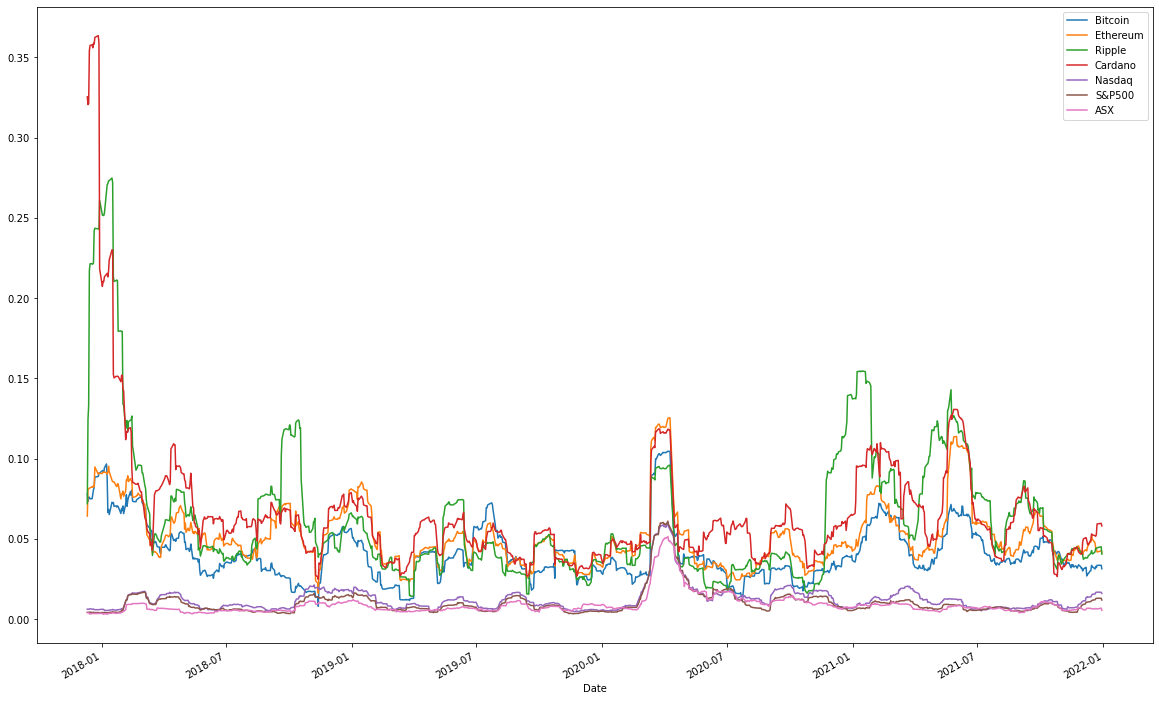

In [15]:
#calculate rolling standard deviation of the combined porfolio
combined_df.rolling(window =21).std().plot(figsize=(20, 13))


In [16]:
#correlation
correlation = combined_df.corr()
correlation.style.background_gradient(cmap="winter")

,Bitcoin,Ethereum,Ripple,Cardano,Nasdaq,S&P500,ASX
Bitcoin,1.000000,0.776456,0.503753,0.518149,0.251640,0.231805,0.109903
Ethereum,0.776456,1.000000,0.624061,0.590383,0.266006,0.250140,0.118299
Ripple,0.503753,0.624061,1.000000,0.630403,0.163339,0.155803,0.047760
Cardano,0.518149,0.590383,0.630403,1.000000,0.188999,0.187676,0.069444
Nasdaq,0.251640,0.266006,0.163339,0.188999,1.000000,0.945029,0.361572
S&P500,0.231805,0.250140,0.155803,0.187676,0.945029,1.000000,0.432894
ASX,0.109903,0.118299,0.047760,0.069444,0.361572,0.432894,1.000000


In [ ]:
#MC_even_dist = MCSimulation(
#    portfolio_data = combined_df,
#    weights = [1],
#    num_simulation = 500,
#   num_trading_days = 365*10
#)